In [2]:
import polars as pl
import numpy as np
bio = pl.read_csv("lahman_people.csv")
pbp = pl.read_csv("savant_data_2021_2023.csv")
pbp

pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,zone,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,…,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
str,str,f64,f64,f64,str,str,str,str,i64,str,str,str,str,str,str,i64,str,i64,i64,i64,f64,f64,f64,f64,str,str,str,i64,i64,str,f64,f64,str,str,f64,f64,…,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64
"""FF""","""2021-04-05""",93.2,0.84,5.74,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…","""strikeout""","""swinging_strike""",13,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",2,null,3,2,2021,0.43,1.57,-0.05,1.41,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-3.263176,-135.5206,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.47,null,null,0.0,1,0,0,null,47,7,"""4-Seam Fastball""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",166,-0.014,-0.134,"""SP""",1,0,97,22,3
"""SL""","""2021-04-05""",82.9,1.03,5.69,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…",null,"""foul""",5,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",null,null,3,2,2021,-0.42,-0.34,0.09,2.24,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-1.343797,-120.739091,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.66,null,null,null,null,null,null,null,47,6,"""Slider""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",309,0.0,0.0,"""SP""",1,0,96,22,3
"""FF""","""2021-04-05""",94.6,-1.85,5.77,"""514eeb6e6c17085fc1adabf03f1adc…","""afb9b85defc6fe5c3f48681480eff4…","""caught_stealing_3b""","""ball""",14,"""R""","""R""","""R""","""3c4ec083bb4b200556718068a3cea7…","""284da2e9c8943a9faa155f56f0faaa…","""B""",2,null,2,2,2021,-0.56,1.53,2.01,1.92,null,"""c8f1ff43c331519aab03daab36b84b…",null,2,4,"""Top""",null,null,"""3103eeddc91e18c223c7ef4d3c12f2…",null,11.292119,-137.173707,…,"""a9b53974ac34cd7c03133051645ef4…","""c3b12c33078b6ce2f0c8287913cd68…","""88a241e142df6a547f9188eb81f5c2…","""c1efd3145c820257fae2347ff56758…","""4f6c643961e8df8f6d76d136b13ba2…","""a7ab335ba29a72bc194f77b694f23b…","""ccbeebb83e2f368d70aca48df9d3ca…",54.12,null,null,0.0,0,0,0,null,28,6,"""4-Seam Fastball""",0,4,4,0,4,0,4,0,"""Standard""","""Standard""",220,0.014,-0.202,"""SP""",1,0,95,19,3
"""FF""","""2021-04-05""",97.1,1.86,6.57,"""875eeca87c6f80182a88c2a7b92c04…","""0f061b9439845159c394a71e55d635…","""field_out""","""hit_into_play""",13,"""R""","""R""","""L""","""8499d67c7ea3ce9671a0574ff23364…","""febb17c5596d048b6a6a4eea23cfe0…","""X""",7,"""line_drive""",3,2,2021,0.75,1.56,-0.84,2.21,null,null,"""29df9634e71f12ec4754b370e647db…",2,5,"""Bot""",90.32,88.66,"""c4db34402ba417ae6cc0cf8eca1c05…",null,-8.928735,-140.780154,…,"""80f3a94c7bf1ed6397

In [3]:
def get_counts(data, type):#janky way to do this?
    """
    Gets count of playing time
    data - df of interest
    type - whether batter or pitcher
    """
    return (data
            .group_by(type,'game_pk', 'at_bat_number', 'game_year')
            .len().group_by(type, 'game_year').len()
            .rename({"len":"PA"}).pivot('game_year', index = type, values = 'PA'))
batterAB = pbp.pipe(get_counts, 'batter').select("batter", "2021", "2022", "2023")
pitcherBF = pbp.pipe(get_counts, 'pitcher').select("pitcher", "2021", "2022", "2023")
batterAB

batter,2021,2022,2023
str,u32,u32,u32
"""37bfaeb9268f9389dfa6157b48b8c7…",444,667,663
"""10a4db5c6bf3b4f13c48ad7b40019d…",492,227,252
"""92dc6059c836b1d56350ffa0b2e5a8…",46,null,null
"""1840dc0b0ec72496c4a26e81eb131e…",531,559,378
"""4d6127941ac5ecd5c14f8f666dad7d…",387,673,684
…,…,…,…
"""3dbf066d8094371bb8a526229ed249…",null,103,null
"""911969f42ed79b91bf1af292e701c0…",5,null,null
"""1d7beaf707e455f76ede0b81f60d4e…",7,null,null


In [194]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import root_mean_squared_error
#running linear regression of past 2 seasons to apply to 2023 - about as good as expected(pretty bad)
def test_model_sklearn(model, data, x, y):
    X_train, X_test, y_train, y_test = train_test_split(data.select(x), data.select(y), test_size = 0.25, random_state = 42) 
    #use random_state=42!!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    return root_mean_squared_error(y_pred, y_test)
test_model_sklearn(LinearRegression(), batterAB.fill_null(0), ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherBF.fill_null(0), ['2022', '2021'], ['2023'])
#similar to averaging method - expected due to nature of MLR 
#baseline to beat: batter: 130.2384341194738, pitcher:145.577135969748

(120.1345812826487, 138.20768898448134)

In [5]:
def get_means(data):
    #using average of 2022, 2021 data to estimate 2023 data
    return (data.with_columns(pl.mean_horizontal(['2022', '2021'])
                                    .alias('row_mean')).fill_null(0)
                                    .select(['2023', 'row_mean']))
batter_test, batter_mean = batterAB.pipe(get_means)
pitcher_test, pitcher_mean = pitcherBF.pipe(get_means)
root_mean_squared_error(batter_test, batter_mean), root_mean_squared_error(pitcher_test, pitcher_mean)
#mean method: 178.68480531577185, 175.54575174805603 - about same as MLR method

(147.7921639050094, 168.31630176648687)

In [6]:
#need to predict nulls - looking at MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
def imputeData(estimator, batterdf, pitcherdf, max_iter = 200, random_state = 42):
    imputer = IterativeImputer(estimator = estimator, max_iter=max_iter, random_state=random_state)
    batterABimputed = (pl.DataFrame(imputer.fit_transform(
        batterdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            batter = batterAB.get_column("batter")
    ))
    pitcherBFimputed = (pl.DataFrame(imputer.fit_transform(
        pitcherdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            pitcher = pitcherBF.get_column("pitcher")
    ))
    return batterABimputed, pitcherBFimputed
batterimp, pitcherimp = imputeData(BayesianRidge(), batterAB, pitcherBF)#Bayesian Seems Best - actually converges
#batterimp, pitcherimp = imputeData(DecisionTreeRegressor(), batterAB, pitcherBF, max_iter = 2000)
#batterimp, pitcherimp = imputeData(KNeighborsRegressor(), batterAB, pitcherBF, max_iter = 2000)
test_model_sklearn(LinearRegression(), batterimp, ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherimp, ['2022', '2021'], ['2023'])
#MLR with imputation yields - batter: 108.16645006899171, pitcher: 104.5259354514329
#imputation seems better than just filling with 0


(92.76865958382781, 105.52996945814775)

In [7]:
import datetime
import polars_xdt as xdt
bio
#months in league to standardize? vs. age
openingMonths = {
    year : datetime.date(year, 10, 1) for year in range(2021, 2024)
}
bio = (
    bio
    .lazy()
    .with_columns(
        pl.col("birthDate").str.to_date("%Y-%m-%d").alias("birthDT"),
        pl.col("debut").str.to_date("%Y-%m-%d").alias("debutDT"),
        
    )
    .collect()
)
def monthDelta(start, end):
    return (pl.date_ranges(start, end,'1mo',closed='right')).list.len()
monthdata = (
    bio
    .with_columns(
        monthDelta(pl.col("birthDT"),openingMonths[2021]).alias("Age2021"),
        monthDelta(pl.col("birthDT"),openingMonths[2022]).alias("Age2022"),
        monthDelta(pl.col("birthDT"),openingMonths[2023]).alias("Age2023"),
        monthDelta(pl.col("debutDT"),openingMonths[2021]).alias("TIL2021"),
        monthDelta(pl.col("debutDT"),openingMonths[2022]).alias("TIL2022"),
        monthDelta(pl.col("debutDT"),openingMonths[2023]).alias("TIL2023"),
    ) 
).select("player_mlb_id", "playerID_LAHMAN", pl.col("^[Age | TIL].*$"))
#openingMonths
monthdata

player_mlb_id,playerID_LAHMAN,Age2021,Age2022,Age2023,TIL2021,TIL2022,TIL2023
str,str,u32,u32,u32,u32,u32,u32
"""0629cd765e77d52b8a43cb56621c82…","""146ae8ecba2a3af909b0814df68b5d…",429,441,453,134,146,158
"""33438ca2fdf93ff73b2e1bcc5da305…","""543bb62c4bdd4911df4bd1a2313a97…",312,324,336,3,15,27
"""f79cf1f3d100e5f34d86ce2cd4c8c3…","""e195c4bc19cb6a08203e3c9e361677…",251,263,275,0,5,17
null,"""7265712e9970a0afa6ad8214b74253…",312,324,336,13,25,37
"""3d65b1ac983ce90ff1f21f56b62788…","""0029980d1ad27d254bc1f60e31a32f…",293,305,317,26,38,50
…,…,…,…,…,…,…,…
"""fb700ef074fe19c9c4328e120dd91c…","""a5c53be1f59100143df6f70f01d850…",298,310,322,0,0,0
"""0cb4ea486038c8edcb71036139fcef…","""d05f17e03fd8f465d6b97ea2b98858…",260,272,284,0,0,0
"""128f3d8f2092540735e1a741529518…","""a504d79a7e6fcabd6edf101e0e4b45…",263,275,287,0,0,0


In [8]:
#this is a silly way to do this...
batterzeros = batterAB.fill_null(0)
pitcherzeros = pitcherBF.fill_null(0)
batterData = batterzeros.join(monthdata, left_on = "batter", right_on = "player_mlb_id")
pitcherData = pitcherzeros.join(monthdata, left_on = "pitcher", right_on = "player_mlb_id")
def convertTimeSeries(data, type):
    PlayingTime = pl.concat(
        [
            data.get_column('2021'),
            data.get_column('2022'),
            data.get_column('2023')
        ],
        how='vertical'
    )
    age = pl.concat(
        [
            data.get_column('Age2021'),
            data.get_column('Age2022'),
            data.get_column('Age2023')
        ],
        how='vertical'
    )

    experience = pl.concat(
        [
            data.get_column('TIL2021'),
            data.get_column('TIL2022'),
            data.get_column('TIL2023')
        ],
        how='vertical'
    )
    season = pl.concat(
        [
            pl.Series([2021] * int(experience.len() / 3)).alias("year"),
            pl.Series([2022] * int(experience.len() / 3)),
            pl.Series([2023] * int(experience.len() / 3)),
        ],
        how = 'vertical'
    )
    players = pl.concat(
        [
            data.get_column(type),
            data.get_column(type),
            data.get_column(type)
        ],
        how='vertical'
    )
    timeseries = pl.DataFrame([players, season, age, experience, PlayingTime]).rename({"Age2021": "Age", "TIL2021": "TIL", "2021": "PlayingTime"})
    return timeseries
pitcherTS = convertTimeSeries(pitcherData, "pitcher")
batterTS = convertTimeSeries(batterData, "batter")

In [9]:
wobas = (pbp.filter(pl.col("woba_value").is_not_null())
 .group_by("batter", "game_year")
 .mean().select("batter", "game_year", "estimated_woba_using_speedangle")).with_columns(
     (pl.col("game_year") + 1).alias("next_year")
 ).rename({"estimated_woba_using_speedangle": "seasonWOBA"})
wobas

batter,game_year,seasonWOBA,next_year
str,i64,f64,i64
"""7697cdad70aa01d9e4015b56f31a29…",2021,0.327306,2022
"""63010ddee8efefb0c8495979427b6b…",2021,0.103,2022
"""3faa4e4fae31dccec5c3d3d612a6d1…",2023,0.274509,2024
"""40ee59b20c81451d7a781f62a7b7e3…",2021,0.37716,2022
"""f8c628afc5a0bcc09c78de315be28c…",2021,0.456857,2022
…,…,…,…
"""67e41a583ed6915acedf8a84d34d11…",2022,0.412894,2023
"""5b740a56489fb4d760c0586db33f0d…",2021,0.561,2022
"""9deade90ff2e096dc2f802bbbc1447…",2021,0.374045,2022


In [142]:
#sample_batter = wobas.select(pl.first('batter')).item()#this is really unintuitive?
batterdata = pbp.with_columns(
        pl.col("estimated_woba_using_speedangle").fill_null(pl.col("woba_value")).alias("xwoba")
    )
batterdata.select("xwoba", "estimated_woba_using_speedangle", "woba_value", "batter").filter(pl.col("batter").str.starts_with("bcfe3b7e6b498b243aa5c5ddcb81d5"))

xwoba,estimated_woba_using_speedangle,woba_value,batter
f64,f64,f64,str
0.0,null,0.0,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
0.0,null,0.0,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"


In [143]:
def RegressToMean(data, pbp):
    WOBApopMeans = {year : data.filter(pl.col("game_year") == year).get_column("seasonWOBA").mean() for year in range(2021, 2024) }
    batterdata = pbp.with_columns(
        pl.col("estimated_woba_using_speedangle").fill_null(pl.col("woba_value")).alias("xwoba")
    )
    batterdata = batterdata.filter((pl.col("xwoba").is_not_null())).group_by("batter", "game_year").agg([
            pl.col("xwoba").mean().alias("woba_mean"),
            pl.col("xwoba").var().alias("woba_varPerformance"),
            pl.col("xwoba").len().alias("PT")
        ])
    def popvar(year):
        yearbatter = batterdata.filter(pl.col("game_year") == year)
        tolerance = 0.00001
        diff = 1000
        var = -20
        while(diff > tolerance):
            #iterate until convergance
            #this is a janky way to do this - surely there is a way for polars to resolve columns?
            varbatters = yearbatter.with_columns(
                ((pl.col("woba_mean") - WOBApopMeans[year])**2 - pl.col("woba_varPerformance") / pl.col("PT")).alias("woba_varTalent")
            )

            varbatters = varbatters.with_columns(
                ((var + pl.col("woba_varTalent") / pl.col("PT"))**2).alias("sum(popvar,noisevar)"))
            
            varbatters = varbatters.with_columns(
                (pl.col("woba_varPerformance") / pl.col("sum(popvar,noisevar)")).alias("numerator"),
                (1 / pl.col("sum(popvar,noisevar)")).alias("denominator"),
            )
            new_var = varbatters.get_column("numerator").sum() / varbatters.get_column("denominator").sum()
            diff = abs(new_var - var)
            var = new_var
        return var
    popvars = {year : popvar(year) for year in range(2021, 2024)}
    batterdata = batterdata.with_columns(
        pl.when((pl.col('woba_varPerformance') == 0 )|( pl.col("woba_varPerformance").is_null()))
            .then(pl.col("game_year").replace_strict(popvars)).otherwise(pl.col('woba_varPerformance')).alias("woba_varPerformance")

    )
    batterdata = batterdata.with_columns(#is there a weighted average method for polars?
        ((pl.col("PT")) / pl.col("woba_varPerformance")).alias("noiseWeight"),
        (1 / pl.col("game_year").replace_strict(popvars)).alias("popWeight")
    )
    batterdata = batterdata.with_columns(
        (((pl.col("noiseWeight") * pl.col("woba_mean")) + (pl.col("popWeight") * pl.col("game_year").replace_strict(WOBApopMeans)))
          / (pl.col("noiseWeight") + pl.col("popWeight"))).alias("RegressedWOBA"),
        (pl.col("game_year").replace_strict(WOBApopMeans)).alias("PopWOBAMean"),
        (pl.col("game_year").replace_strict(popvars)).alias("PopVar"),
        (pl.col("game_year") + 1).alias("next_year")
    )
    print(popvars)
    return batterdata#.select("batter", "game_year", "woba_mean", "RegressedWOBA", "PT")
regressedWOBA = RegressToMean(wobas, pbp)

{2021: 0.12443189556382916, 2022: 0.1239719758229037, 2023: 0.1364675682613381}


In [144]:
regressedWOBA

batter,game_year,woba_mean,woba_varPerformance,PT,noiseWeight,popWeight,RegressedWOBA,PopWOBAMean,PopVar,next_year
str,i64,f64,f64,u32,f64,f64,f64,f64,f64,i64
"""a005eb90265f5f1aab9e88a48ec4d0…",2022,0.248988,0.108739,161,1480.604769,8.066339,0.249483,0.340404,0.123972,2023
"""0f69eb701a55b4137c4f9912a16bf5…",2022,0.331508,0.120746,128,1060.077216,8.066339,0.331575,0.340404,0.123972,2023
"""cf37ddacfdbd60f20cff15e645d2e0…",2022,0.3006,0.063684,10,157.025203,8.066339,0.302545,0.340404,0.123972,2023
"""4600b4d76c203bfa61c16bee1e87c5…",2021,0.261403,0.095734,154,1608.627296,8.036525,0.261668,0.314823,0.124432,2022
"""37bfaeb9268f9389dfa6157b48b8c7…",2022,0.356592,0.176901,666,3764.808972,8.066339,0.356557,0.340404,0.123972,2023
…,…,…,…,…,…,…,…,…,…,…
"""5ff4ced80a4fae6654ff7b423fd5ba…",2021,0.02,0.124432,1,8.036525,8.036525,0.167412,0.314823,0.124432,2022
"""c6020d12585d4a0d7b1babd840c54f…",2021,0.0,0.124432,2,16.073049,8.036525,0.104941,0.314823,0.124432,2022
"""c15acd7eb2cabec4fc9dfa9bb7f6cd…",2021,0.306699,0.090722,246,2711.586564,8.036525,0.306723,0.314823,0.124432,2022


In [124]:
#regressedWOBA.filter(pl.col("RegressedWOBA").is_null())
pbp.filter((pl.col("batter").str.starts_with('231d573a7f3607f76f16eb294509c7cd9dfb52c3')) & (pl.col("game_year") == 2021)).filter(pl.col("xwoba").is_not_null())

pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,zone,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,…,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
str,str,f64,f64,f64,str,str,str,str,i64,str,str,str,str,str,str,i64,str,i64,i64,i64,f64,f64,f64,f64,str,str,str,i64,i64,str,f64,f64,str,str,f64,f64,…,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64
"""FF""","""2021-07-08""",96.5,-3.35,5.24,"""231d573a7f3607f76f16eb294509c7…","""daa3aaa2e8a74038f063a7271f8f53…","""home_run""","""hit_into_play""",14,"""R""","""L""","""R""","""cfe86a1ce53f1c1323a31d22bcd96b…","""b84bd0a157d9480459410843be5428…","""X""",null,"""fly_ball""",1,2,2021,-0.8,1.36,0.33,1.19,"""674d8bf718327b8290f85890e3db03…","""3d7e673996ded2adc951734ee10ace…","""06662d5b2e1290f7ee60a65ca4d0f9…",2,4,"""Bot""",219.61,58.29,"""d9c9f5241a964c7d7bd723e78ae75f…",null,11.53942,-139.858454,…,"""58b9fee780d57f9991464d4c9e1b9b…","""e909a78dd1088038e3906796b44903…","""7c3ed05a692adc3cb5a5766fed3b9e…","""deb7b468a91c97b3c1b2c019c08913…","""01062805175a65bbfb5e2024853137…","""ebfdfcefeaa4148ec27eca02f529b8…","""073c953adf860e87af6671245c3aba…",54.29,0.9,1.547,2.0,1,0,3,6,40,4,"""4-Seam Fastball""",2,8,2,8,8,6,6,8,"""Standard""","""Strategic""",229,0.187,3.554,"""SP""",1,0,87,18,1


In [145]:
nextyearWOBA = batterTS.join(regressedWOBA, left_on = ["batter","year"], right_on = ["batter", "next_year"])
currentWOBA = batterTS.join(regressedWOBA, left_on = ["batter","year"], right_on = ["batter", "game_year"])


In [147]:
currentWOBA.filter(pl.col("RegressedWOBA") > 0.5)#.select("batter")#.item()
#will need to regress these to the mean - wobas are hella inflated - future work
#analyzing position players - finding a way to analyze fielding

batter,year,Age,TIL,PlayingTime,woba_mean,woba_varPerformance,PT,noiseWeight,popWeight,RegressedWOBA,PopWOBAMean,PopVar,next_year
str,i64,u32,u32,u32,f64,f64,u32,f64,f64,f64,f64,f64,i64
"""83902f320532a76b56367b2d4c62ff…",2021,435,148,1,0.803,0.124432,1,8.036525,8.036525,0.558912,0.314823,0.124432,2022
"""fd67ccf8b23135c11534c5c4774bdc…",2021,324,5,1,0.7,0.124432,1,8.036525,8.036525,0.507412,0.314823,0.124432,2022
"""f6a7de4f155d53a6d4bdcb1c22b94f…",2021,291,1,1,0.7,0.124432,1,8.036525,8.036525,0.507412,0.314823,0.124432,2022
"""e48f9c8c2739837fda3d42ea3e3e58…",2021,343,39,1,0.7,0.124432,1,8.036525,8.036525,0.507412,0.314823,0.124432,2022
"""7c681762bb5e92ac8bf0a53eb9b41e…",2021,274,5,1,0.7,0.124432,1,8.036525,8.036525,0.507412,0.314823,0.124432,2022
"""26ac979bacd0020877044a7be8138b…",2021,428,113,1,0.767,0.124432,1,8.036525,8.036525,0.540912,0.314823,0.124432,2022
"""27c6fba076399f5a9ed7d239040f8a…",2021,313,37,2,0.7,0.124432,2,16.073049,8.036525,0.571608,0.314823,0.124432,2022
"""a452b63757e97e908baad6557a89b8…",2021,340,41,1,0.7,0.124432,1,8.036525,8.036525,0.507412,0.314823,0.124432,2022
"""0b7ac2052237fe7518844407df4c96…",2022,336,50,1,0.7,0.123972,1,8.066339,8.066339,0.520202,0.340404,0.123972,2023


<Axes: xlabel='Age', ylabel='PlayingTime'>

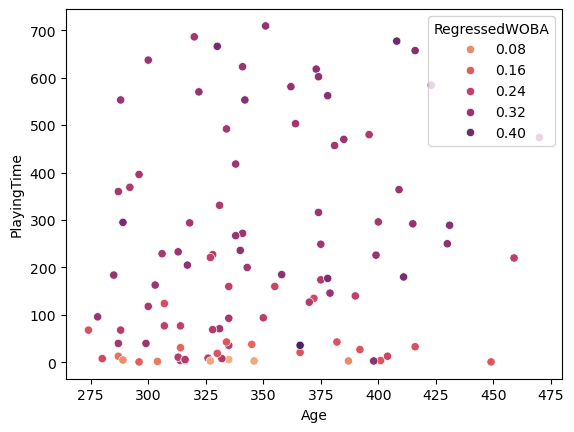

In [156]:
import seaborn as sns
cmap = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x="Age", y="PlayingTime", hue = "RegressedWOBA",palette=cmap, data = currentWOBA.sample(100))

<Axes: xlabel='Age', ylabel='PlayingTime'>

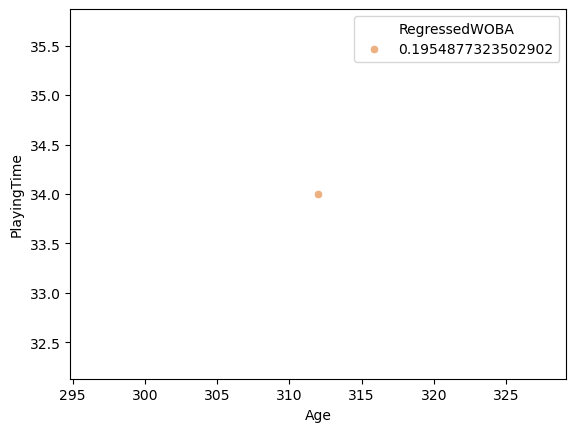

In [171]:
batter = "a7303f4e8da8737691fc5803f2fcc1"
sns.scatterplot(x="Age", y="PlayingTime", hue = "RegressedWOBA", palette=cmap, data = currentWOBA.filter(pl.col("batter").str.starts_with(batter)))

In [182]:
batterWOBA = regressedWOBA.pivot("game_year", index = "batter", values = "RegressedWOBA").select("batter", "2021", "2022", "2023")

In [ ]:
batterDataWOBA = batterData.rename({"2021": "2021_PT", "2022": "2022_PT", "2023": "2023_PT"}).join(batterWOBA, on = "batter").rename({"2021": "2021_WOBA", "2022": "2022_WOBA", "2023": "2023_WOBA"})
#parabolic fit for age?
seasonTS = batterDataWOBA.pivot()

batter,2021_PT,2022_PT,2023_PT,playerID_LAHMAN,Age2021,Age2022,Age2023,TIL2021,TIL2022,TIL2023,2021_WOBA,2022_WOBA,2023_WOBA
str,u32,u32,u32,str,u32,u32,u32,u32,u32,u32,f64,f64,f64
"""a005eb90265f5f1aab9e88a48ec4d0…",163,162,342,"""93c82ba6d9c19a4024168af4b2193e…",303,315,327,2,14,26,0.313488,0.249483,0.27826
"""0f69eb701a55b4137c4f9912a16bf5…",359,128,0,"""08a878ca35065a5353fdb640d97104…",348,360,372,64,76,88,0.322965,0.331575,null
"""cf37ddacfdbd60f20cff15e645d2e0…",1,10,0,"""4b56f66b6f8da12c49a92a93cdb031…",276,288,300,1,13,25,0.157412,0.302545,null
"""4600b4d76c203bfa61c16bee1e87c5…",154,0,0,"""377efd6a784fcb50f76d30bc9760b0…",329,341,353,73,85,97,0.261668,null,null
"""37bfaeb9268f9389dfa6157b48b8c7…",444,667,663,"""8aaa128a4fd2e21b111d6a1b5110c1…",366,378,390,84,96,108,0.311258,0.356557,0.33871
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3c8235024a0e3e3f1dcfef16080eaa…",26,0,0,"""c76bfbc83462f3bcd0f91a474bcb5f…",311,323,335,49,61,73,0.340918,null,null
"""3142966391d5752fe8f2c279e019bf…",122,0,0,"""e549c7d61868d67f3ebbfafcf3257f…",313,325,337,28,40,52,0.258116,null,null
"""5ff4ced80a4fae6654ff7b423fd5ba…",1,0,0,"""f908b84668079ec2a4ad18b492e88b…",333,345,357,1,13,25,0.167412,null,null


In [233]:
currentWOBA#.select("batter", "year", "Age", "TIL", "PlayingTime")

batter,year,Age,TIL,PlayingTime,woba_mean,woba_varPerformance,PT,noiseWeight,popWeight,RegressedWOBA,PopWOBAMean,PopVar,next_year
str,i64,u32,u32,u32,f64,f64,u32,f64,f64,f64,f64,f64,i64
"""33438ca2fdf93ff73b2e1bcc5da305…",2021,312,3,3,0.124,0.015376,3,195.109261,8.036525,0.131549,0.314823,0.124432,2022
"""80f3a94c7bf1ed6397017744dbb75f…",2021,416,90,657,0.354866,0.172174,656,3810.105566,8.036525,0.354782,0.314823,0.124432,2022
"""b4246bd7233f08e749626eb0b7647d…",2021,285,41,358,0.423137,0.244764,358,1462.631682,8.036525,0.422545,0.314823,0.124432,2022
"""81272c934b63edda7b2c6ca9f268f5…",2021,312,40,555,0.322542,0.164158,555,3380.880676,8.036525,0.322524,0.314823,0.124432,2022
"""c296dc19142d27a8a0d4a738256f74…",2021,397,112,39,0.199103,0.063825,39,611.042405,8.036525,0.200605,0.314823,0.124432,2022
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""40269fcece49d72af6daae840d0eb4…",2023,306,0,6,0.263333,0.122516,6,48.973089,7.327748,0.27548,0.356658,0.136468,2024
"""a7303f4e8da8737691fc5803f2fcc1…",2023,312,0,34,0.192559,0.08432,34,403.226621,7.327748,0.195488,0.356658,0.136468,2024
"""ba083a4eaa2ab6bce8f4f6ca047960…",2023,242,0,36,0.269528,0.162105,36,222.078049,7.327748,0.272311,0.356658,0.136468,2024


In [230]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("PlayingTime ~ Age + RegressedWOBA", currentWOBA, groups=currentWOBA.to_pandas()['batter'])#all roads lead to pandas...

mdf = md.fit()
mdf.summary()
currentWOBA.select("PlayingTime").shape,
(sum((pl.Series(mdf.predict()) - currentWOBA.get_column("PlayingTime"))**2))**(1/2) / currentWOBA.select("PlayingTime").shape[0]
root_mean_squared_error(pl.Series(mdf.predict()), currentWOBA.get_column("PlayingTime"))#this is not good!

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:              MixedLM   Dependent Variable:   PlayingTime
No. Observations:   2208      Method:               REML       
No. Groups:         1196      Scale:                14979.2307 
Min. group size:    1         Log-Likelihood:       -14377.2280
Max. group size:    3         Converged:            Yes        
Mean group size:    1.8                                        
---------------------------------------------------------------
                Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
---------------------------------------------------------------
Intercept      -254.790   36.583 -6.965 0.000 -326.491 -183.089
Age               0.412    0.099  4.159 0.000    0.218    0.606
RegressedWOBA  1206.820   49.344 24.457 0.000 1110.107 1303.533
Group Var     16695.708   11.856                               
===============================================================

"""

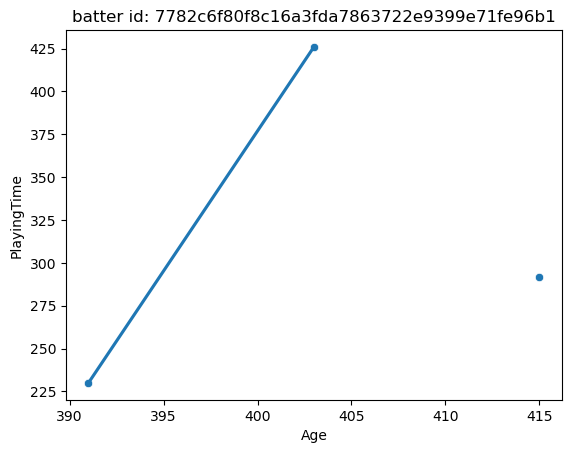

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def fitCurve(batter):
    batterdf = currentWOBA.filter(pl.col("batter").str.starts_with(batter))
    if batterdf.shape[0] == 1:
        return "Only one point"
    sns.regplot(x='Age', y='PlayingTime', data=batterdf.head(2), ci = False, scatter= False).set_title(f"batter id: {batter}")
    sns.scatterplot(data=batterdf, x='Age', y='PlayingTime')
iter = 20
fitCurve(list(currentWOBA.group_by("batter").len().filter(pl.col("len") == 3).get_column("batter"))[iter])#not always linear! - need to use nonlinear approaches - somewhat good interpolation

In [281]:
#not always linear! - need to use nonlinear approaches - somewhat good interpolation
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('batter_analysis.pdf') as pdf:
    batter_list = list(currentWOBA.group_by("batter").len().filter(pl.col("len") == 3).get_column("batter"))
    for i in range(len(batter_list)): 
        print(batter_list[i])
        plt.figure()  
        fitCurve(batter_list[i])
        pdf.savefig() 
        plt.close()  

a9b53974ac34cd7c03133051645ef424e81c3073
ccbeebb83e2f368d70aca48df9d3cab30efa80cf
726f300105ad69d160d0835fbbaaa4dabd7d7d39
705bd2962c69a2d18c196329eb7167125e3c1e06
24fa12505cdc29d6c15f5e6c08e00f1c42e4373f
e4ba6c019866c79d03d1e1be7e49acc9453ccf99
0dd87d3394b8e4828b192487a4d747744bc39cf4
b6a6add81b3c0c558430e20f668a39790058918d
74fbd2c42d3848988ba22644a52c38a95f26283b
9913abc66fc538f252a1e2fa25f2a4ed7281f71d
fa024bd05ae46a00b122ece10199c6cb2b0efbfe
c008321df24d751dddfe7f58ba933bb426f4bbaf
a2492466d4a5ab3f0b605db3ce867e966f605a0d
de04a3db23231866d64b7e4a0c6fe5bfda2447d7
786672c08d33f1282d91da2df59542edc3219d39
58bd390684a1b46fc0f2df6e75a8c563593e307e
1ccfa4a1ec1b4a6fca216a1e270f6183505fe38c
414d21ef2332a57d42fc40c9aff480652823df54
deb7b468a91c97b3c1b2c019c08913d7aed65774
a1639e7871881ef53f45c5a8c8e5a4d42dc73347
19f683ce76088d78377da48963e1c90cbac9ffaa
1a35380236861a3e9242fc1790692a52ca977c92
cd008120919654d8408cbea3cf6b8908bf57dd02
83b0284261e2bda954f2c6b2dc67c2a5e4f3c127
637aa60cb3c5b707